In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from analysis import download_database
download_database()

Connection successfully established ... 
File successfully downloaded ...


In [18]:
from analysis import DataBase
data = DataBase('equipsy.ABETdb')
group_experiments = data.get_group_experiments()

-- ----------------------------------------------------------
-- MDB Tools - A library for reading MS Access database files
-- Copyright (C) 2000-2011 Brian Bruns and others.
-- Files in libmdb are licensed under LGPL and the utilities under
-- the GPL, see COPYING.LIB and COPYING files respectively.
-- Check out http://mdbtools.sourceforge.net
-- ----------------------------------------------------------

-- That file uses encoding UTF-8

CREATE TABLE `tbl_Schedules`
 (
	`SID`			int not null auto_increment unique, 
	`SName`			varchar (100), 
	`SEnviro`			varchar (50), 
	`SMachineName`			varchar (30), 
	`SVersion`			varchar (10), 
	`SRunDate`			datetime, 
	`SFinal`			boolean NOT NULL, 
	`ZE_GUID`			varchar (50), 
	`ZS_GUID`			varchar (50), 
	`SRecCount`			int
);

-- CREATE INDEXES ...
ALTER TABLE `tbl_Schedules` ADD PRIMARY KEY (`SID`);

CREATE TABLE `tbl_Schedule_Notes`
 (
	`SID`			int, 
	`NName`			varchar (100), 
	`NValue`			text
);

-- CREATE INDEXES ...

CREATE TABLE `tbl_Data`
 (


No MSysRelationships


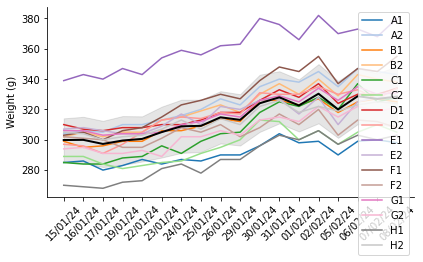

In [9]:
from plotting import *
display_weights(group_experiments, output='weights.png')

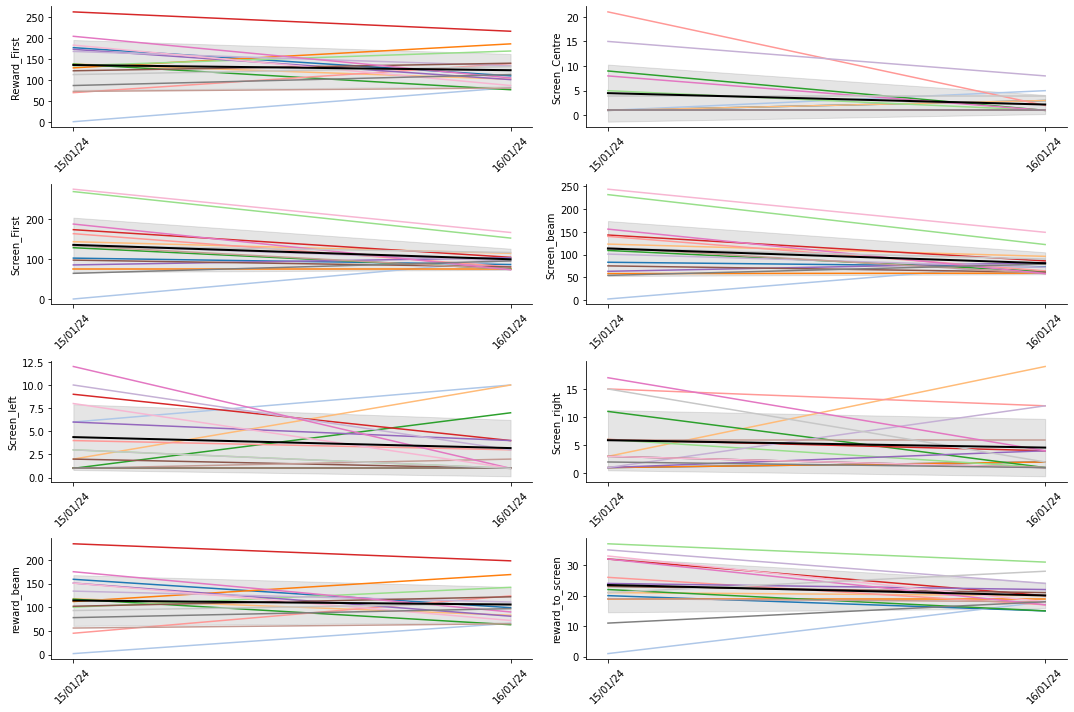

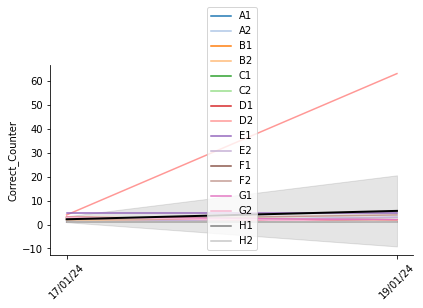

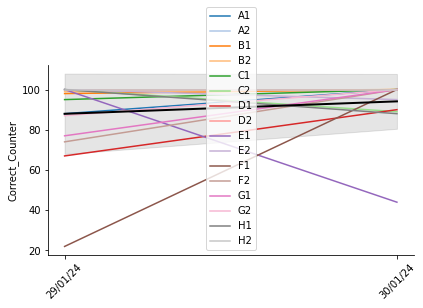

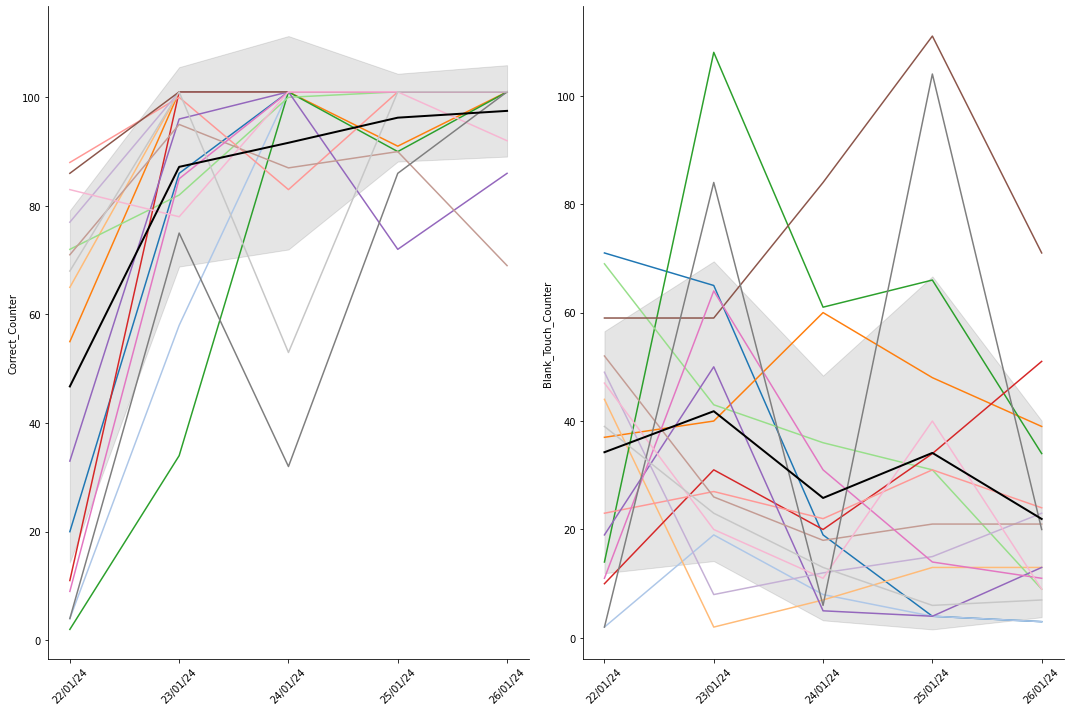

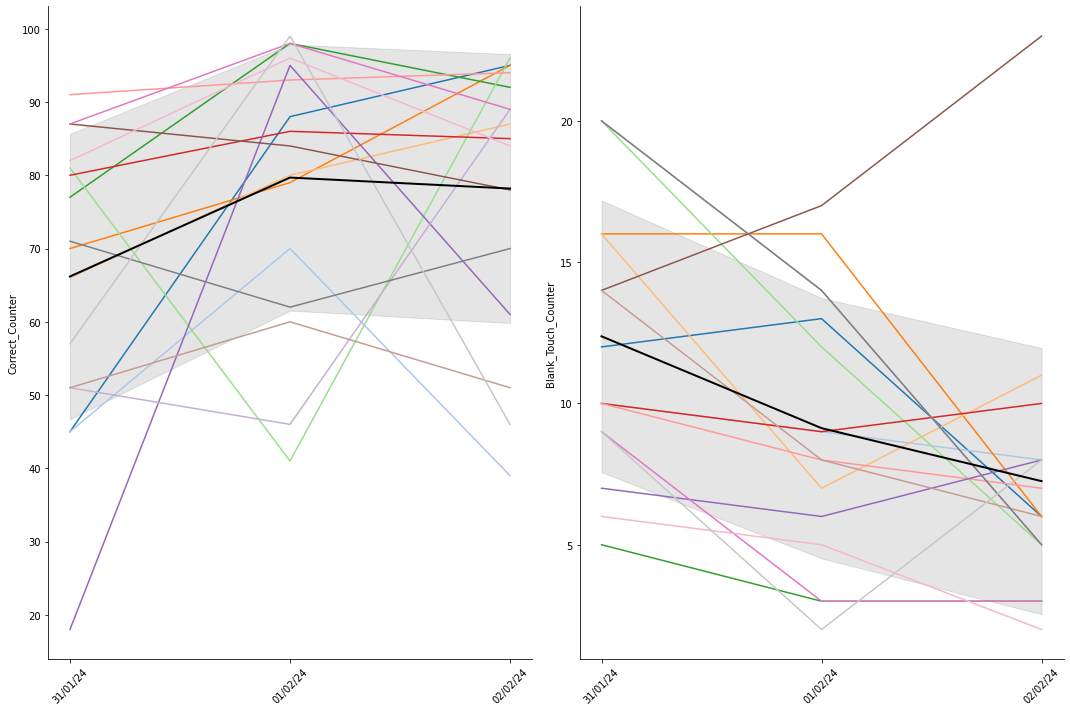

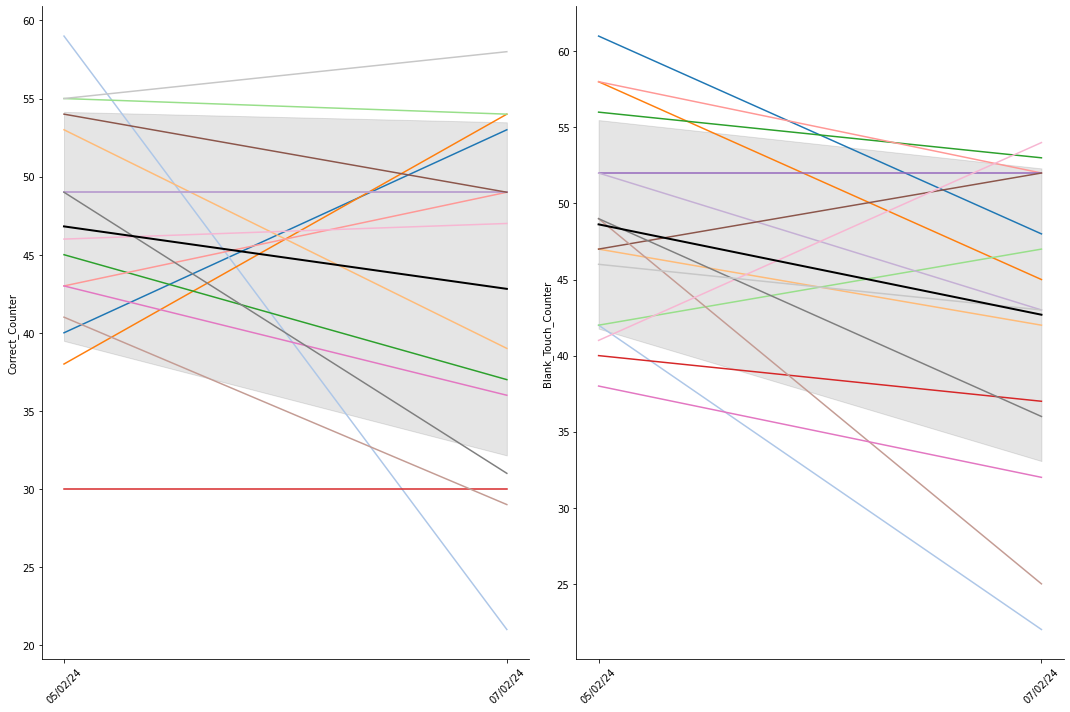

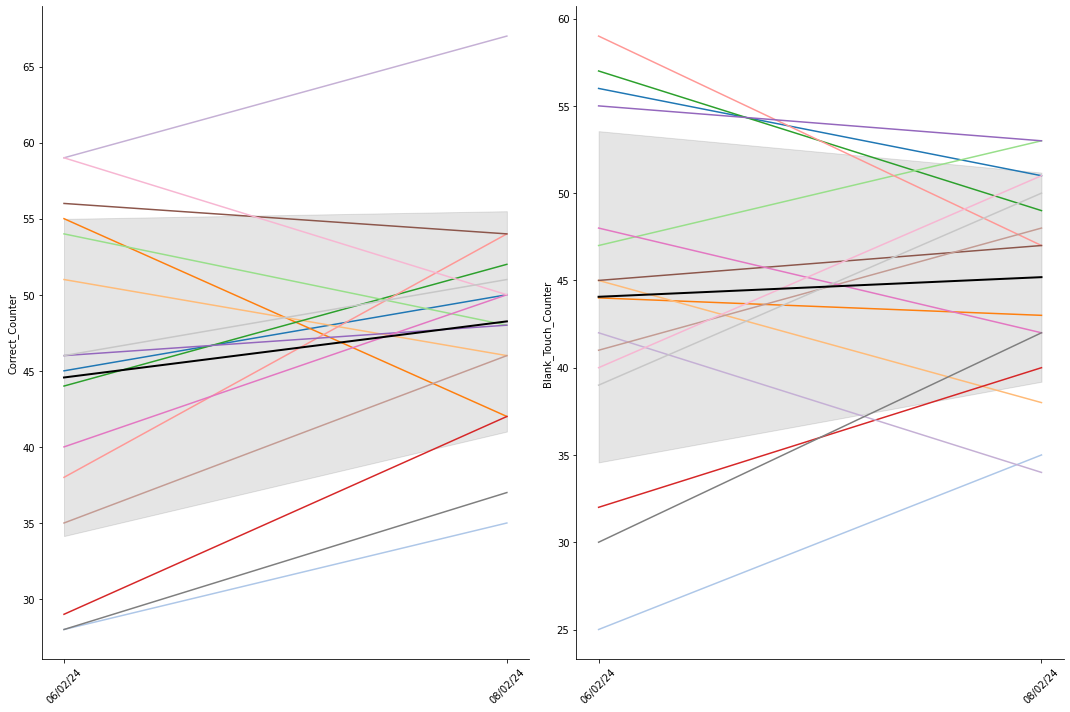

In [19]:
from plotting import *
for type in group_experiments.all_types:
    a = group_experiments.get_experiments_per_types(type)
    display_variables(a, output=f'{type}.png')

R-squared: 0.051285


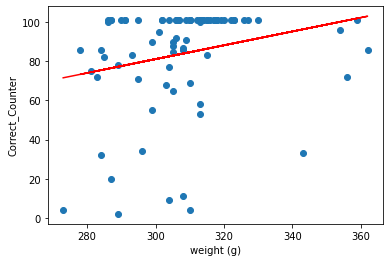

In [17]:
# Get initial weights

for type in ['Must Touch']:
    a = group_experiments.get_experiments_per_types(type)
    all_weights = []
    all_perfs = []
    for e in a.experiments:
        all_weights += [e.weight]
        all_perfs += [e.stats['Correct_Counter']]
all_weights = np.array(all_weights)
all_perfs = np.array(all_perfs)
#plt.plot(all_weights, all_perfs, '.')

plt.xlabel('weight (g)')
plt.ylabel('Correct_Counter')
from scipy import stats
res = stats.linregress(all_weights, all_perfs)
plt.plot(all_weights, all_perfs, 'o', label='original data')
plt.plot(all_weights, res.intercept + res.slope*all_weights, 'r', label='fitted line')
print(f"R-squared: {res.rvalue**2:.6f}")

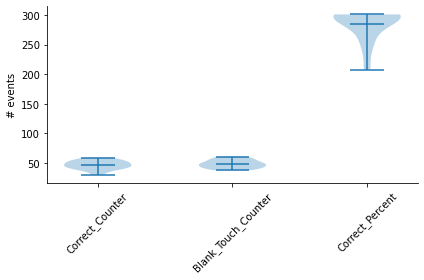

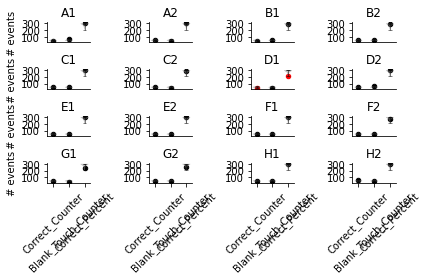

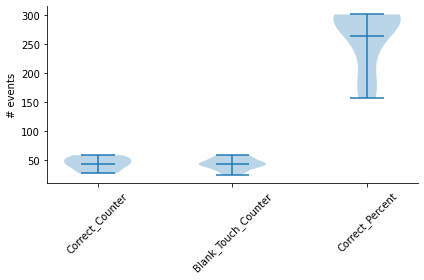

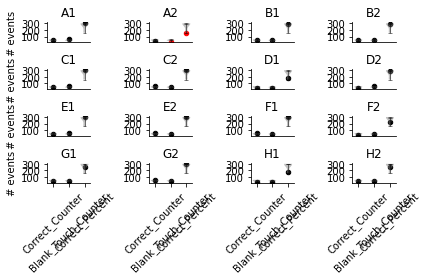

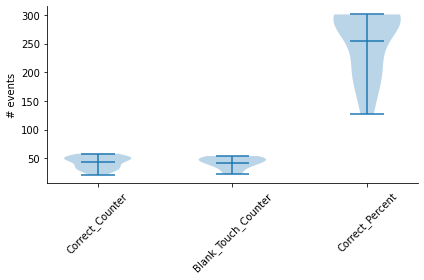

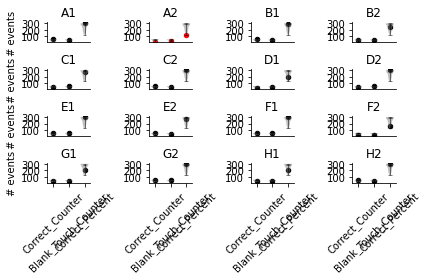

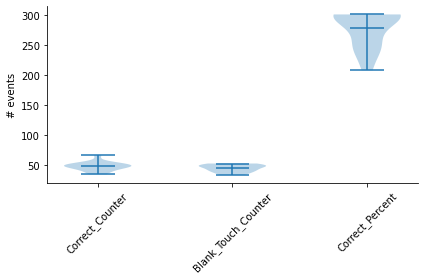

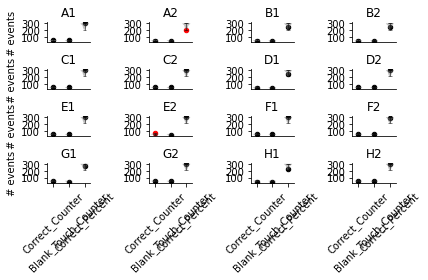

In [20]:
for date in ['05/02/24', '06/02/24', '07/02/24', '08/02/24']:
    a = group_experiments.get_experiments_per_dates(date)
    mydate = date.replace('/', '')
    display_stats_group_experiments(a, output=f'stats_{mydate}.png')
    display_group_experiments(a, output=f'individuals_{mydate}.png')

In [124]:
df = a.experiments[8].get_trial(1)#.to_csv('test.csv')

In [130]:
t_start = df[(df['DEventText'] == 'Group Change Event') & (df['DGroup'] == 5)]['DTime'].values[0]
print(t_start)
t_stop = df[(df['DEventText'] == 'Clear Image by Position') & (df['DGroup'] == 6)]['DTime'].values[0]
print(t_stop)

6.372
7.698


In [132]:
responses = a.experiments[8].get_responses()
times = a.experiments[8].get_reaction_times()
angles = a.experiments[8].get_angular_differences()

0 can not be properly parsed
0 can not be properly parsed
0 can not be properly parsed


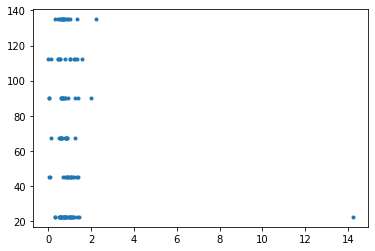

In [133]:
plt.plot(times, angles, '.')

R-squared: 0.043871


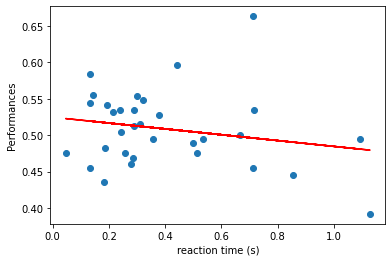

In [67]:
# Get initial weights
for type in ['Theta 1', 'Theta 2']:
    a = group_experiments.get_experiments_per_types(type)
    all_reaction_times = []
    all_perfs = []
    for e in a.experiments:
        all_reaction_times += [e.get_reaction_times().mean()]
        all_perfs += [e.stats['Correct_Counter']/(e.stats['Correct_Counter'] + e.stats['Blank_Touch_Counter'])]
all_reaction_times = np.array(all_reaction_times)
all_perfs = np.array(all_perfs)

plt.xlabel('reaction time (s)')
plt.ylabel('Performances')
from scipy import stats
res = stats.linregress(all_reaction_times, all_perfs)
plt.plot(all_reaction_times, all_perfs, 'o', label='original data')
plt.plot(all_reaction_times, res.intercept + res.slope*all_reaction_times, 'r', label='fitted line')
print(f"R-squared: {res.rvalue**2:.6f}")